# Challenge
Unsupervised learning is one of the major learning paradigms in machine learning and it enables us to understand the patterns and relationships in the data without the guidance of ground truths in the data. Although many of the recent breakthroughs in machine learning in the previous decades came from the supervised learning front, unsupervised learning remains one of the most promising directions that the current data science and artificial intelligence can make use of. Although, we're living in a world with abundant amounts of data, labeling them with the ground truths is not an easy task as many times this requires costly and challenging human labor to annotate them. Unsupervised learning is of primary importance for data science as it has the potential to exploit enormous amounts of data without any need for annotation.

## Challenge
Throughout this module, we introduced the amazing and yet challenging domain of unsupervised learning by covering some of the most popular clustering and dimensionality reduction algorithms. Now, it's time for you to apply your unsupervised learning knowledge. In this challenge, you'll work with a dataset of your choice. As always, Kaggle is one of your best friends. You can spend some time on Kaggle and pick a beautiful dataset. Using this dataset:

- Apply dimensionality reduction techniques to visualize the observations.
- Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import time

from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score

# clustering models
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans, MiniBatchKMeans

# dimensionality reduction methods
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

In [2]:
df_mall_customers = pd.read_csv('Mall_Customers.csv')

In [3]:
df_mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df_mall_customers.shape

(200, 5)

In [5]:
df_mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df_mall_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df_mall_customers.nunique().sort_values()

Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
CustomerID                200
dtype: int64

In [8]:
df_mall_customers.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

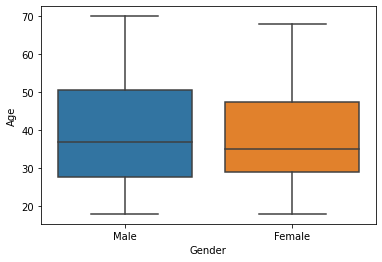

In [9]:
sns.boxplot(data = df_mall_customers, x = 'Gender', y = 'Age')
plt.show()

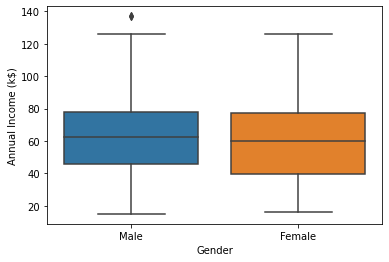

In [10]:
sns.boxplot(data = df_mall_customers, x = 'Gender', y = 'Annual Income (k$)')
plt.show()

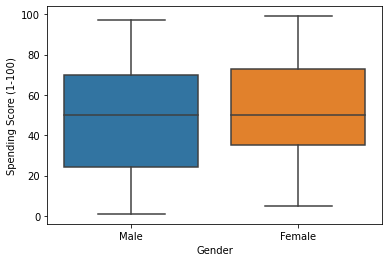

In [11]:
sns.boxplot(data = df_mall_customers, x = 'Gender', y = 'Spending Score (1-100)')
plt.show()

### K-means Clustering

In [12]:
df_kmeans = df_mall_customers.copy()

In [13]:
g={'Male': 1, 'Female': 0}

df_kmeans['Gender'] = df_kmeans['Gender'].map(g)

In [14]:
df_kmeans.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
# model feature list
feature_list = [col_name for col_name in df_kmeans.columns.copy()
              if col_name not in ['CustomerID','Age']]

In [16]:
X = df_kmeans[feature_list].values
y = df_kmeans['Age']

In [17]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [18]:
# Not knowing the number of clusters (3) we try a range such 1,10
# For the ELBOW method check with and without init='k-means++'

Sum_of_squared_distances = []
for k in range(1,10):
    km = KMeans(n_clusters=k, init='k-means++')
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)

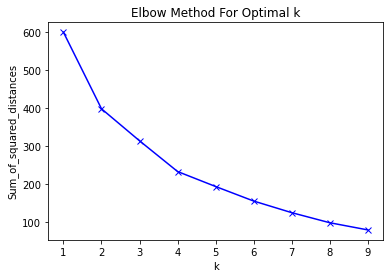

In [19]:
plt.plot(range(1,10), Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

It looks like 4 clusters could be a good option to start.

In [20]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

32.2 ms ± 2.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Below is the code that breaks.

In [21]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

IndexError: string index out of range

<Figure size 720x360 with 0 Axes>

### Below, the code works but it's without color.

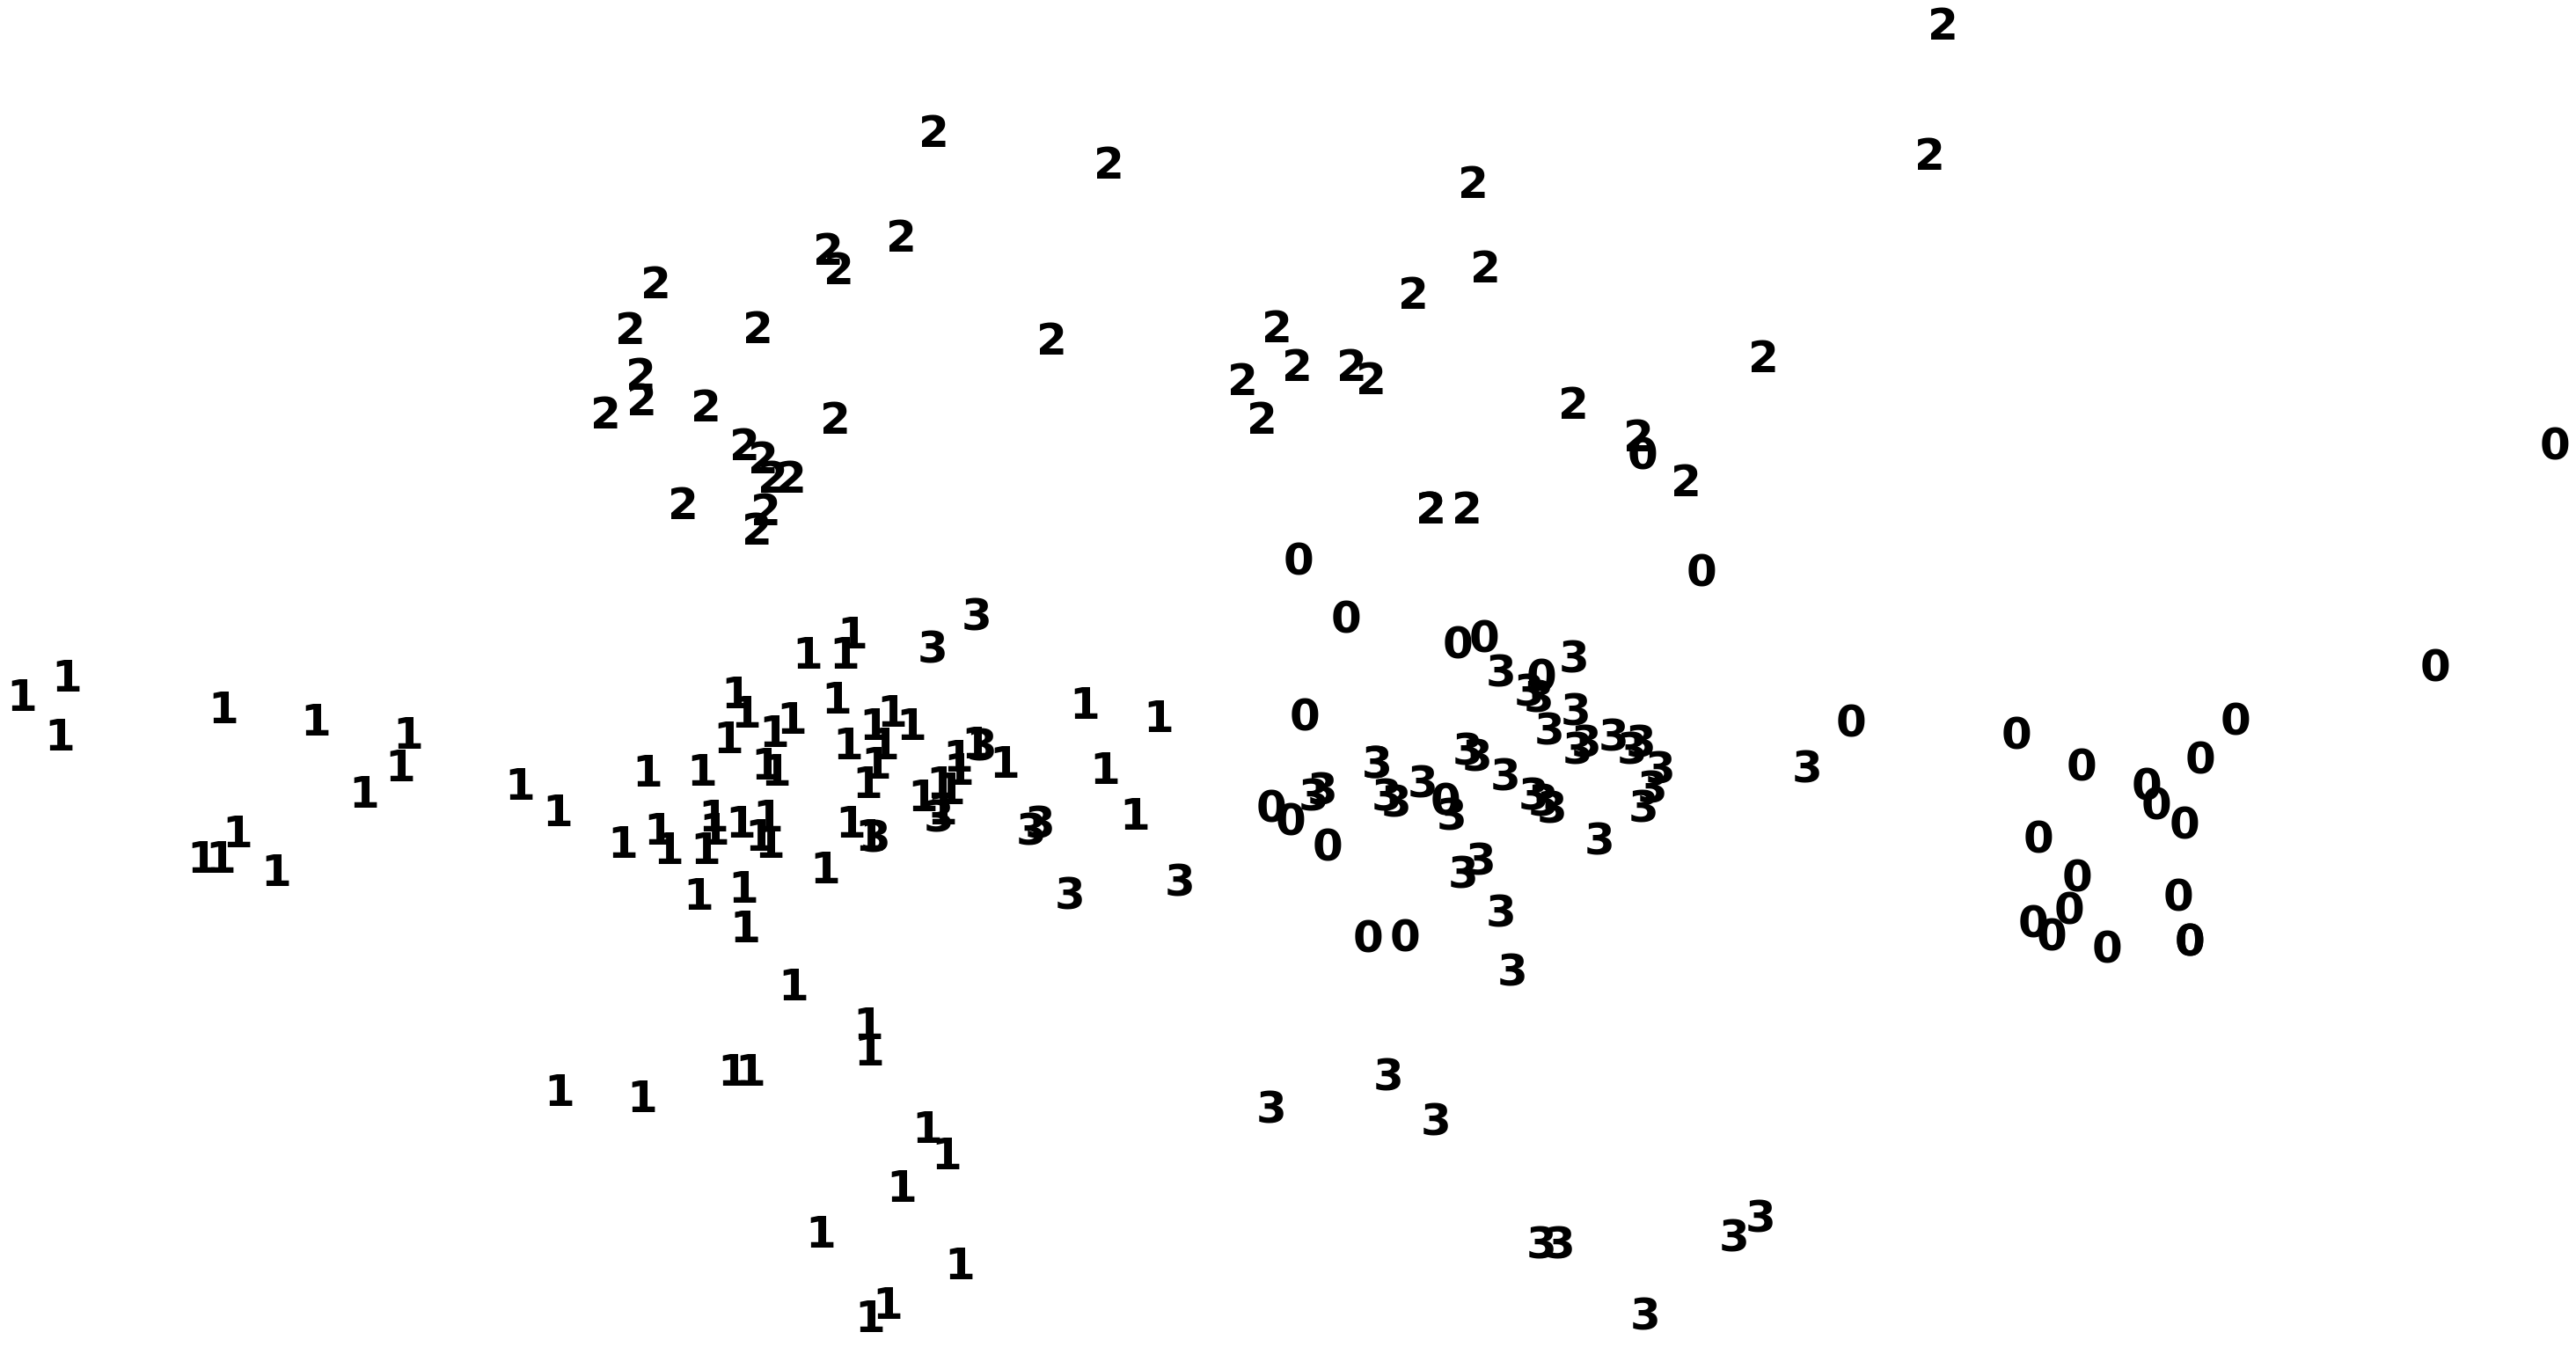

In [23]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()